# Distribution of happiness

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import scipy.stats as stt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Dataset of happiness (2015).

In [2]:
data15 = pd.read_csv('Desktop/kaggle/2015.csv')
data15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In this dataset we have some features, which depends on Happiness Score (it follows from their description). Thus let's start the analysis with jointplot.

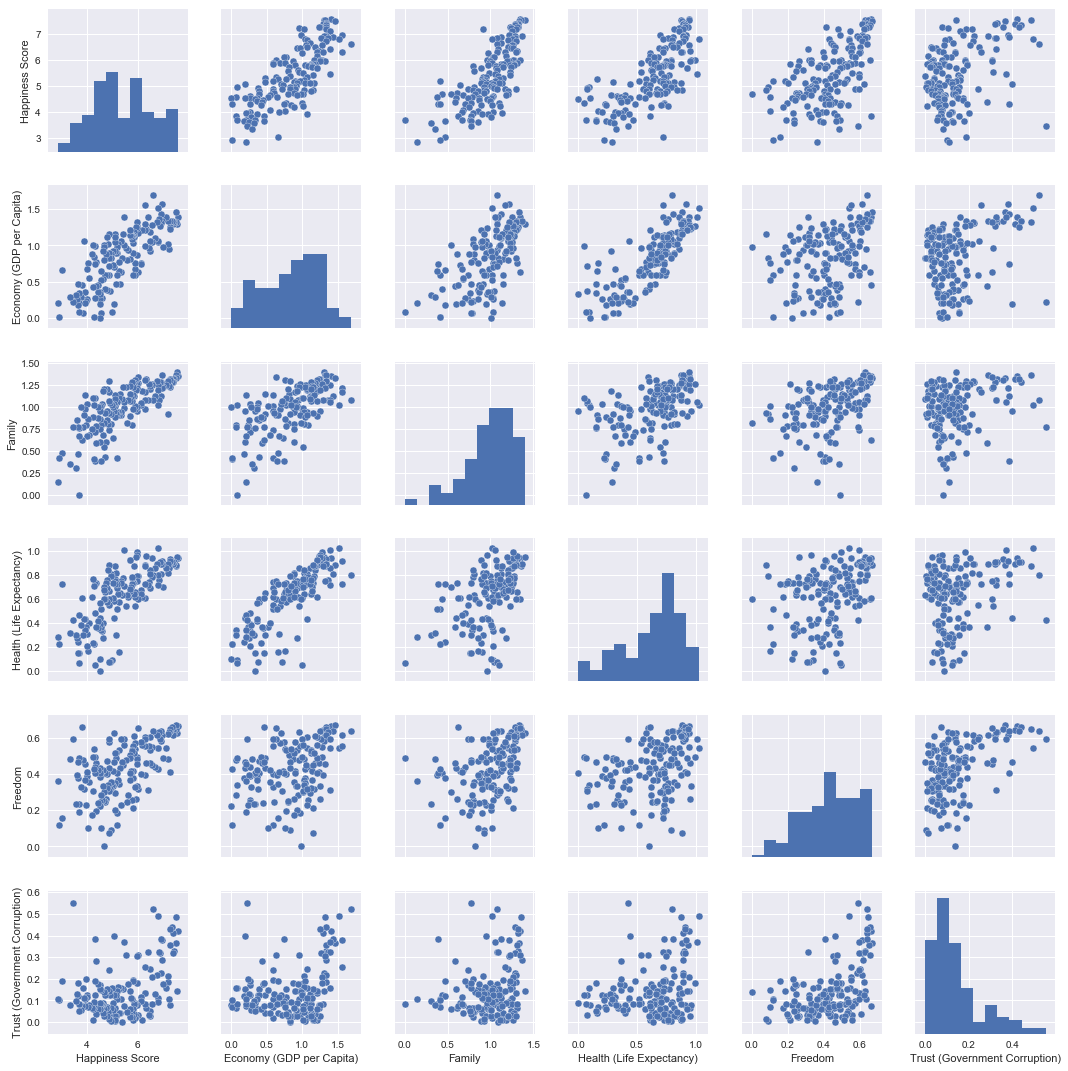

In [3]:
sns.pairplot(data15[['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', \
    'Freedom', 'Trust (Government Corruption)']]);

We can observe visual high correlation. Economy/Happiness graphics seems like ready model for linear regression. Check it with corrplot.

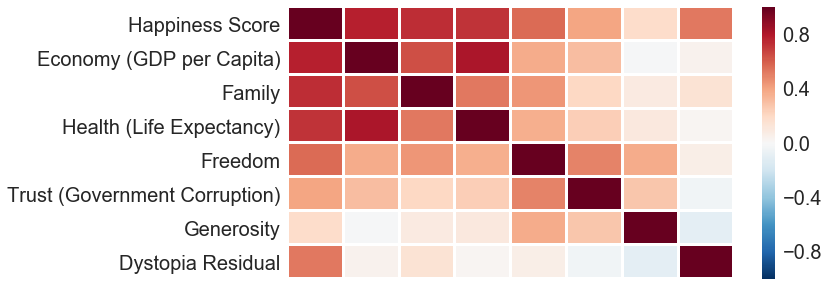

In [4]:
fig = plt.figure(figsize=(10,5))
sns.set(style="white",font_scale=2)
sns.heatmap(data15.dropna()[['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', \
    'Freedom', 'Trust (Government Corruption)','Generosity', 'Dystopia Residual']].corr(), fmt='.2f',annot=True,\
             xticklabels=False,linewidth=2);

The most correlated features with Happiness Score are Economy, Family, Health and Freedom. It's logical, because these basic principles provide high level of happy. What about histogramm of happyness? From it's histogramm we can see something like bimodal distribution. Distribution tails arent equal - highly contented people more than unhappy.

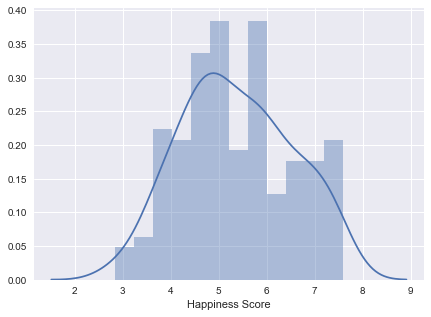

In [5]:
fig = plt.figure(figsize=(7,5))
sns.set()
sns.distplot(data15['Happiness Score'],bins=12);
#data15['Happiness Score'].hist(bins=20);

## Geographic map

Now start with interesting visual part of my kernel - map visualization. For this problem I use Basemap module - part of matplotlib. (https://matplotlib.org/basemap/users/examples.html)

In [6]:
import os
os.environ['PROJ_LIB'] = r'C:\Anaconda3\Library\share'
from mpl_toolkits.basemap import Basemap

To visualize this map, I need capital's coordinates - latitude and longitude. I take this data from this site: http://techslides.com/list-of-countries-and-capitals. Then you just have to join the tables.

In [7]:
concap = pd.read_csv('Desktop/kaggle/concap.csv')
concap.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [8]:
data_full = pd.merge(concap[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         data15,left_on='CountryName',right_on='Country')

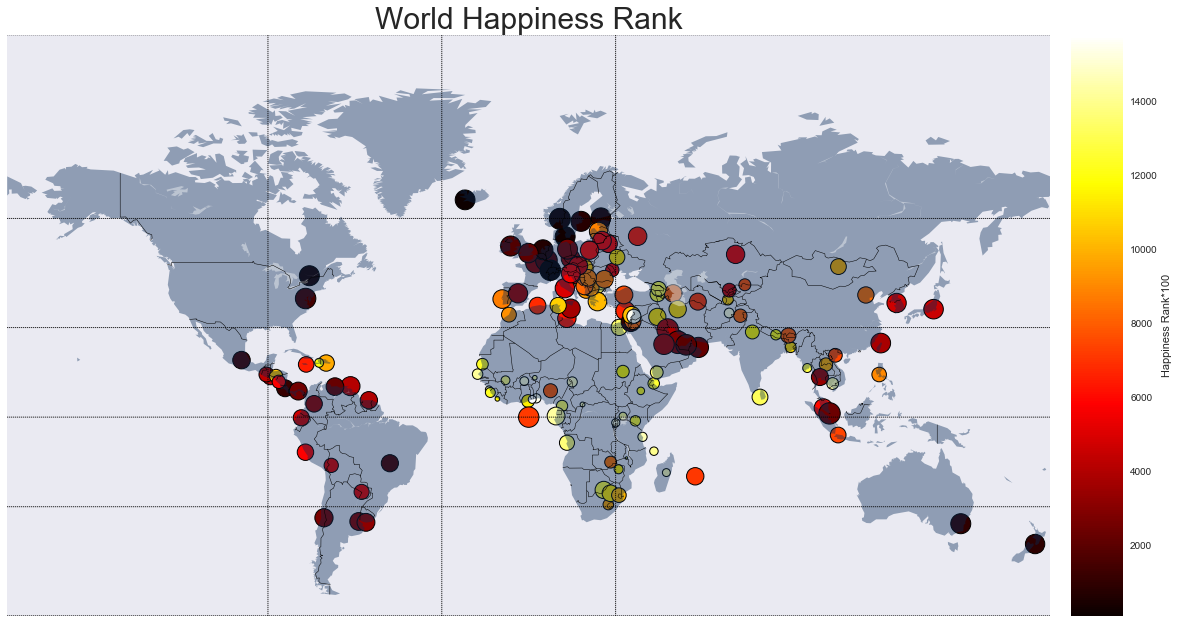

In [9]:
def mapWorld():
    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
    #m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-90,91.,30.))
    m.drawmeridians(np.arange(-90,90.,60.))
    
    #m.drawmapboundary(fill_color='#FFFFFF')
    lat = data_full['CapitalLatitude'].values
    lon = data_full['CapitalLongitude'].values
    a_1 = data_full['Happiness Rank'].values
    a_2 = data_full['Economy (GDP per Capita)'].values
    m.scatter(lon, lat, latlon=True,c=100*a_1,s=300*a_2,linewidth=1,edgecolors='black',cmap='hot', alpha=1)
    
    m.fillcontinents(color='#072B57',lake_color='#FFFFFF',alpha=0.4)
    cbar = m.colorbar()
    cbar.set_label('Happiness Rank*100')
    #plt.clim(20000, 100000)
    plt.title("World Happiness Rank", fontsize=30)
    plt.show()
plt.figure(figsize=(20,20))
mapWorld()

From this map you can see happiness leaders regions - North America, Western Europe, Australia and New Zealand. Colors from this map reflects the level of happiness, and size - the effect of GDP on happiness rating. This map is quite interesting to consider, because you can understand a lot of new things about the world. For example - Immediately stand out the countries of the Persian Gulf in their region. In Africa, only a few have a large rank of happiness. Small size of round means little gdp per capita - including due to the large population.

Consider in detail European region. Here you can see how much Western Europe stands out among its neighbors.

In [10]:
contr_list = list(data15[data15['Region'].isin(['Western Europe','Central and Eastern Europe'])]['Country'].unique())
eu_gps = concap[concap['CountryName'].isin(contr_list)]
eu_data = data15[data15['Region'].isin(['Western Europe','Central and Eastern Europe'])]
eu_full = pd.merge(eu_gps[['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude']],\
         eu_data,left_on='CountryName',right_on='Country')

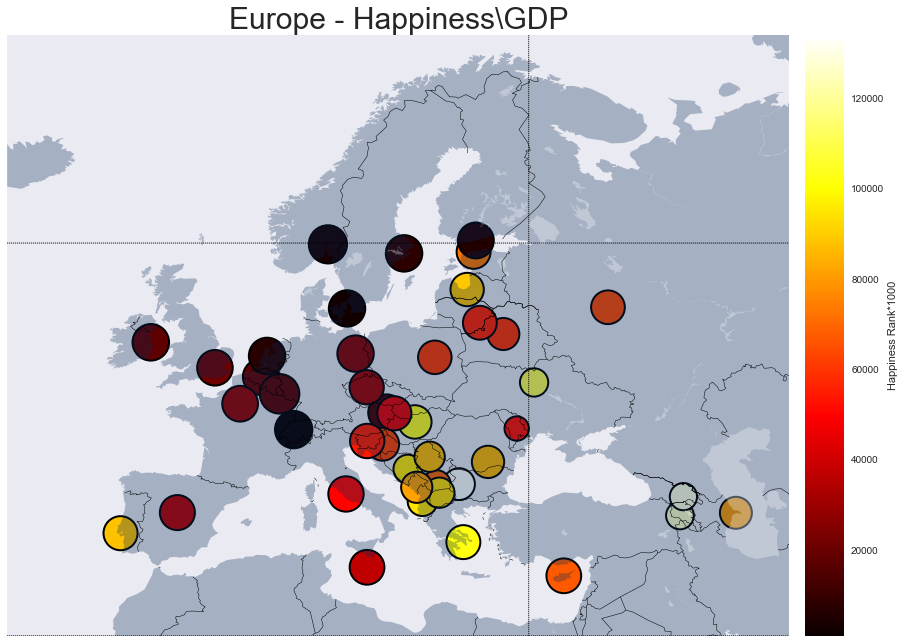

In [11]:
def mapEurope(column_color, column_size,colbar=True):
    m = Basemap(projection='mill',llcrnrlat=30,urcrnrlat=72,\
                llcrnrlon=-20,urcrnrlon=55,resolution='l')
    m.drawcountries()
    m.drawstates()
    #m.drawmapboundary()
    m.drawparallels(np.arange(-90,91.,30.))
    m.drawmeridians(np.arange(-90,90.,60.))
    lat = eu_full['CapitalLatitude'].values
    lon = eu_full['CapitalLongitude'].values
    a_1 = eu_full[column_color].values
    a_2 = eu_full[column_size].values
    #s=1000*a_2
    m.scatter(lon, lat, latlon=True,c=1000*a_1,s=1000*a_2,linewidth=2,edgecolors='black',cmap='hot', alpha=1)
    m.fillcontinents(color='#072B57',lake_color='#FFFFFF',alpha=0.3)
    if colbar:
            m.colorbar(label='Happiness Rank*1000')
    else:pass
plt.figure(figsize=(15,15))
plt.title('Europe - Happiness\GDP', fontsize=30)
mapEurope('Happiness Rank','Economy (GDP per Capita)')

Here we can see, that freedom extend to the happiness less that GDP. I specially don't change scale. Also we can see a clear relation between the country's GDP and the level of trust to the government.

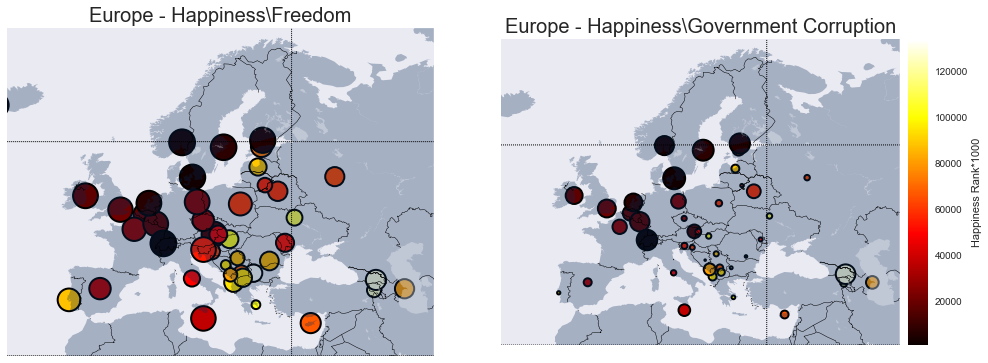

In [12]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,3,1)
ax1.set_title('Europe - Happiness\Freedom', fontsize=20)
mapEurope('Happiness Rank','Freedom',colbar=False)
ax2 = fig.add_subplot(2,3,2)
ax2.set_title('Europe - Happiness\Government Corruption', fontsize=20)
mapEurope('Happiness Rank','Trust (Government Corruption)')
plt.tight_layout()

On the other hand, almost all countries are the same in matters of family.

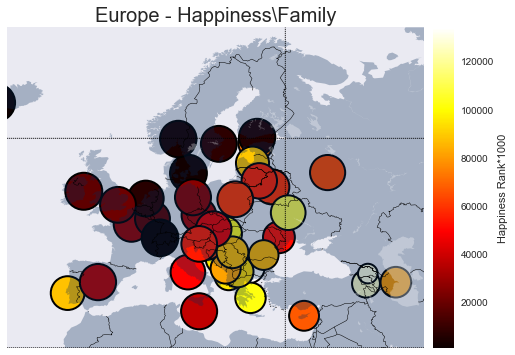

In [13]:
plt.figure(figsize=(8,8))
plt.title('Europe - Happiness\Family', fontsize=20)
mapEurope('Happiness Rank','Family')